<a href="https://colab.research.google.com/github/cristiandvalderramag-dotcom/TALLER_5/blob/main/mlp_inicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

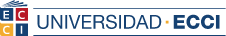
# **SISTEMAS AVANZADOS DE PRODUCCIÓN CON PYTHON**

# **Taller 5 (8h): Ejecución del proyecto en Notebook**



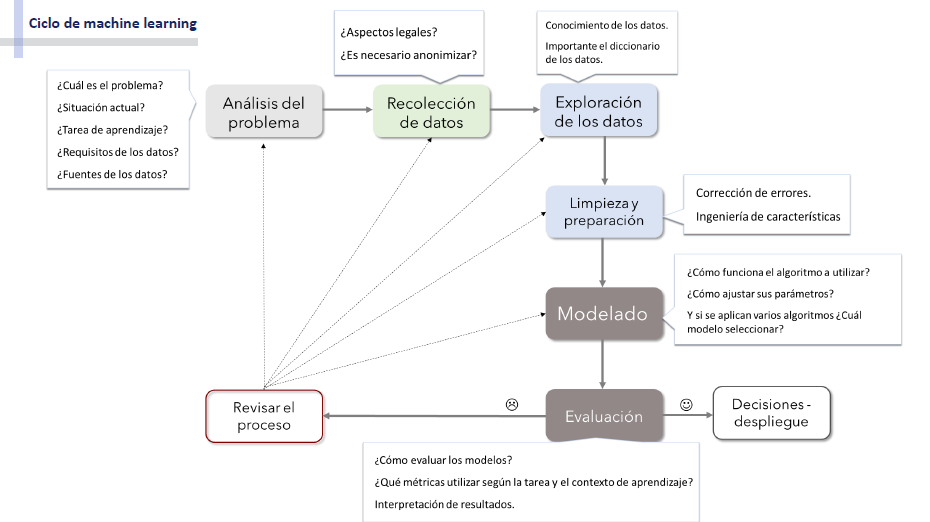


**Objetivo general**

Seguir el ciclo de ML del diagrama para resolver tu problema con dos rutas posibles: Regresión o Clasificación. Documenta cada paso en el notebook.


**Objetivos de la sesión**

---

### **Clase 1: Ruta A — Problema de Regresión 🛠️**

* En esta ruta seguiremos el ciclo completo de machine learning: análisis del problema, recolección de datos, exploración, y limpieza y preparación, para luego pasar al modelado y evaluación. El foco estará en predecir un valor continuo usando un baseline de regresión lineal y una red neuronal para regresión. Ten en cuenta que el orden y la profundidad de cada paso pueden variar según el dataset de cada grupo (por ejemplo, si ya viene limpio o si requiere más ingeniería de variables). Documentaremos claramente cada decisión tomada, las métricas usadas (MAE/RMSE) y las conclusiones.

---

### **Clase 2: Ruta B — Problema de Clasificación🌳**

* Aquí aplicaremos el mismo ciclo: análisis del problema, recolección de datos, exploración, y limpieza y preparación, seguido de modelado y evaluación. Clasificaremos casos binarios comparando regresión logística, perceptrón y un árbol aleatorio (Random Forest). El flujo podrá ajustarse según las características de los datos de cada equipo (por ejemplo, manejo de desbalance o codificación de categorías). Dejaremos registradas las decisiones de preprocesamiento, la elección de la métrica (p. ej., F1/ROC-AUC) y la definición del umbral cuando corresponda.




# **Semana 11 - Clase 1**


  


## 🧭 **Análisis del problema — Bike Sharing (UCI)**

- **Problema de negocio (qué decisión habilita):**
Predecir la **demanda diaria/horaria de bicicletas** para **planear capacidad** (flota, redistribución, turnos y mantenimiento), evitando **quedarse corto** (pérdida de ventas/servicio) o **sobredimensionar** (costos operativos altos).

- **Situación actual (contexto):**
La empresa dispone de históricos de alquileres y clima, pero decide de forma **reactiva**. Se requiere una **estimación confiable** de la demanda para calendarizar personal y mover inventario (bicicletas) con anticipación.

- **Tarea de aprendizaje:**
**Regresión supervisada.** Variable objetivo continua: **`cnt`** = número de alquileres (por **hora** o por **día**, según el archivo elegido).


<div align="center">
  <img src="https://storage.googleapis.com/kaggle-datasets-images/2690506/4623141/f2081a78ee21b5125855a896e8ff8b19/dataset-cover.jpg?t=2022-11-30-10-33-36" width="80%">
</div>

---

###**Requisitos de datos (mínimos):**

* Variables **exógenas ( no estan influidas por ruido u otras variables)** disponibles antes de la decisión: clima (`temp`, `humidity`, `windspeed`, `weather`) y calendario (`season`, `holiday`, `workingday`, `hour/weekday`).
* **Calidad aceptable:** $<$5–10$\%$ de datos nulos manejables, tipificación correcta y **sin fuga de información**.

###**Fuentes de datos:**

* **UCI Bike Sharing Dataset** (público): archivos **`day.csv`** / **`hour.csv`**.

    En este caso se puede acceder al recurso original, el cual es:

    https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

* **Diccionario de variables** provisto en el repositorio original.

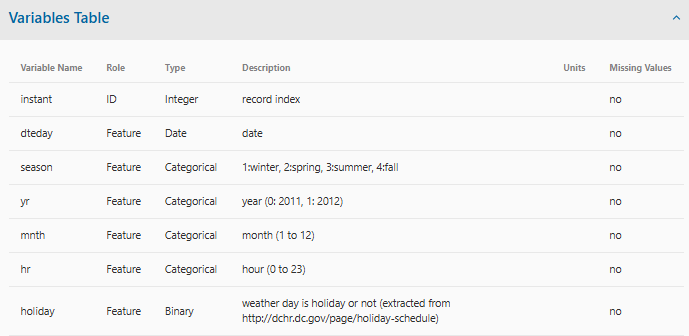

###**Criterio de éxito (métrica + umbral de negocio):**

* Métrica principal: **RMSE** (o **MAE** si hay outliers relevantes).
* Objetivo operativo (ejemplo): **RMSE ≤ 15 alquileres/hora** o **MAE ≤ 10**, consistente en test.

###**Riesgos y supuestos:**

* **Estacionalidad/feriados** impactan fuertemente la demanda.
* **Cambios de política** o eventos atípicos pueden romper patrones.
* No se usan datos personales; dataset **agregado y no sensible**.


### 📥 **Recolección de datos — Bike Sharing (UCI)**

Usaremos el dataset público **UCI Bike Sharing**. Página del repositorio: [https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset). Descarga directa (ZIP): [https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip). Trabajaremos con **una sola granularidad** (día `day.csv` u hora `hour.csv`) y registraremos en el notebook el **enlace de origen** y la **fecha de descarga** para trazabilidad. Antes de modelar, haremos una verificación básica: tipos correctos, rangos razonables y nulos manejables; variables clave: objetivo `cnt`, clima (`temp`, `humidity`, `windspeed`, `weather`) y calendario (`season`, `holiday`, `workingday`, `weekday`, `hour` si aplica).

**Aspectos legales y privacidad.** Este dataset es agregado y no contiene identificadores personales, por lo que **no requiere anonimización adicional** en uso académico. Si algún equipo lo combina con datos propios, debe documentar la finalidad, eliminar identificadores directos, agrupar o truncar campos sensibles y retener solo lo necesario, conforme a la **Ley 1581 de 2012 (Habeas Data)** en Colombia.


In [ ]:
# ============================================================
# CARGA CORRECTA DEL DATASET "BIKE SHARING (UCI)" EN COLAB
# ------------------------------------------------------------
# Objetivo de esta celda:
# 1) Descargar el ZIP oficial desde UCI.
# 2) Descomprimirlo en el entorno de Colab.
# 3) Elegir la granularidad (día u hora) y cargar el CSV a pandas.
# 4) Convertir fechas a tipo datetime y revisar tipos de datos.
# 5) Mostrar un diccionario claro de variables (qué significa cada una).
# 6) Hacer verificaciones básicas: tamaño, nulos, muestra de filas.
# ------------------------------------------------------------
# Nota: Esta celda está MUY comentada a propósito, para personas
#       que están empezando con Python y Colab.
# ============================================================

import os
import zipfile
import urllib.request
import pandas as pd

# ------------------------------------------------------------
# 1) CONFIGURACIÓN BÁSICA DEL PROYECTO (FÁCIL DE EDITAR)
# ------------------------------------------------------------

# Enlace oficial del ZIP en el repositorio UCI:
UCI_ZIP_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"

# El usuario puede elegir la granularidad aquí:
#   - "day"  -> carga el archivo day.csv  (agregado por día)
#   - "hour" -> carga el archivo hour.csv (agregado por hora)
GRANULARITY = "day"  # ✅ CAMBIO: el taller pide trabajar por día

# Carpeta donde guardaremos los archivos descomprimidos
DATA_DIR = "/content/bike_sharing_data"

# ------------------------------------------------------------
# 2) DESCARGA DEL ZIP DESDE UCI
# ------------------------------------------------------------
os.makedirs(DATA_DIR, exist_ok=True)
zip_path = os.path.join(DATA_DIR, "Bike-Sharing-Dataset.zip")

print("Descargando ZIP desde UCI (puede tardar unos segundos)...")
urllib.request.urlretrieve(UCI_ZIP_URL, zip_path)
print("Descarga completa:", zip_path)

# ------------------------------------------------------------
# 3) DESCOMPRESIÓN DEL ZIP
# ------------------------------------------------------------
print("Descomprimiendo archivos...")
with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(DATA_DIR)

print("Contenido descomprimido en:", DATA_DIR)
print("Archivos disponibles:", os.listdir(DATA_DIR))

# ------------------------------------------------------------
# 4) ELECCIÓN DEL CSV SEGÚN LA GRANULARIDAD
# ------------------------------------------------------------
if GRANULARITY == "day":
    csv_path = os.path.join(DATA_DIR, "day.csv")
elif GRANULARITY == "hour":
    csv_path = os.path.join(DATA_DIR, "hour.csv")
else:
    raise ValueError("❌ GRANULARITY debe ser 'day' u 'hour'.")

if not os.path.exists(csv_path):
    raise FileNotFoundError(f"No se encontró el archivo esperado: {csv_path}")

print(f"\n📂 Granularidad elegida: {GRANULARITY.upper()} -> Cargando {os.path.basename(csv_path)}")

# ------------------------------------------------------------
# 5) CARGA DEL CSV CON PANDAS
# ------------------------------------------------------------
parse_cols = ["dteday"]
df = pd.read_csv(csv_path, parse_dates=parse_cols, dayfirst=False, keep_default_na=True)

# ------------------------------------------------------------
# 6) DICCIONARIO DE VARIABLES
# ------------------------------------------------------------
variable_dict = {
    "instant": "Índice de la fila (identificador incremental).",
    "dteday": "Fecha del registro (tipo datetime).",
    "season": "Estación del año (1: invierno, 2: primavera, 3: verano, 4: otoño).",
    "yr": "Año (0: primer año del dataset, 1: segundo año).",
    "mnth": "Mes del año (1 a 12).",
    "holiday": "Indica si el día es festivo (1) o no (0).",
    "weekday": "Día de la semana (0: domingo… 6: sábado).",
    "workingday": "Día laboral (1) o no (0).",
    "weathersit": "Situación del clima (1: bueno, 2: nublado, 3: lluvia ligera, 4: lluvia fuerte/nieve).",
    "temp": "Temperatura normalizada (0 a 1).",
    "atemp": "Temperatura aparente normalizada.",
    "hum": "Humedad normalizada (0 a 1).",
    "windspeed": "Velocidad del viento normalizada (0 a 1).",
    "casual": "Número de alquileres por usuarios casuales (no registrados).",
    "registered": "Número de alquileres por usuarios registrados.",
    "cnt": "Número total de alquileres (objetivo para regresión)."
}

dict_df = pd.DataFrame(
    [(col, variable_dict.get(col, "(no documentada)")) for col in df.columns],
    columns=["columna", "significado"]
)

print("\n=== 📘 DICCIONARIO DE VARIABLES ===")
print(dict_df.to_string(index=False))

# ------------------------------------------------------------
# 7) REVISIÓN DE TIPOS DE DATOS
# ------------------------------------------------------------
if "dteday" in df.columns:
    print("\nTipo de 'dteday':", df["dteday"].dtype)

print("\n=== TIPOS DE DATOS ===")
print(df.dtypes)

# ------------------------------------------------------------
# 8) VERIFICACIONES BÁSICAS DE CALIDAD
# ------------------------------------------------------------
print("\n=== DIMENSIONES DEL DATASET ===")
print("Filas:", len(df), "| Columnas:", df.shape[1])

print("\n=== NULOS POR COLUMNA ===")
print(df.isna().sum())

print("\n=== PRIMERAS FILAS ===")
print(df.head())

# ------------------------------------------------------------
# 9) GUARDAR COPIA LIMPIA INICIAL
# ------------------------------------------------------------
base_csv_path = os.path.join(DATA_DIR, f"base_{GRANULARITY}.csv")
df.to_csv(base_csv_path, index=False)
print(f"\n✅ Copia base guardada en: {base_csv_path}")

print("\n✅ Dataset cargado correctamente. Puedes continuar con el análisis.")


In [ ]:
# Vista del data frame
print("\n=== VISTA RÁPIDA (head) ===")
df.head()

#

### 🔍 **Exploración y conocimiento de los datos — Bike Sharing (UCI)**

En esta fase buscamos **entender la forma y el contexto** del dataset antes de modelar. Revisamos tamaño (filas/columnas), tipos de variables, rangos y valores atípicos, y verificamos si la granularidad elegida (**día** u **hora**) cubre estacionalidad y feriados. La idea es detectar patrones generales (tendencias por clima y calendario), posibles **nulos** o codificaciones inusuales, y confirmar que la variable objetivo `cnt` refleja correctamente la demanda.

**Descripción breve.**
Empezamos con una síntesis: periodo cubierto, frecuencia (día/hora), medias y dispersiones de las variables numéricas, y distribución básica de `cnt`. Si existen transformaciones previas (p. ej., temperaturas normalizadas 0–1), se anotan para no duplicarlas. Si hay desbalance temporal (pocos registros en ciertos meses/horas), se documenta porque afectará la validación.

---

### 📚 **Diccionario de datos (significado de variables)**

| Variable     | Significado breve                                                           |
| ------------ | --------------------------------------------------------------------------- |
| `instant`    | Índice incremental del registro.                                            |
| `dteday`     | Fecha del registro (día).                                                   |
| `season`     | Estación (1 invierno, 2 primavera, 3 verano, 4 otoño).                      |
| `yr`         | Año (0 o 1 según el año en el dataset).                                     |
| `mnth`       | Mes (1–12).                                                                 |
| `hr`         | Hora del día (0–23, solo en `hour.csv`).                                    |
| `holiday`    | Indicador de festivo (1 sí, 0 no).                                          |
| `weekday`    | Día de la semana (0 domingo … 6 sábado).                                    |
| `workingday` | Día laboral (1 sí, 0 no; excluye fines de semana y festivos).               |
| `weathersit` | Clima (1 bueno, 2 nublado/neblina, 3 lluvia ligera, 4 lluvia fuerte/nieve). |
| `temp`       | Temperatura normalizada (0–1).                                              |
| `atemp`      | Sensación térmica normalizada (0–1).                                        |
| `hum`        | Humedad relativa normalizada (0–1).                                         |
| `windspeed`  | Velocidad del viento normalizada (0–1).                                     |
| `casual`     | Alquileres de usuarios casuales (no registrados).                           |
| `registered` | Alquileres de usuarios registrados.                                         |
| `cnt`        | **Objetivo**: total de alquileres (`casual + registered`).                  |

> Nota: algunas columnas son **categóricas codificadas como números** (p. ej., `season`, `weathersit`, `weekday`). Se interpretan como categorías, no como cantidades continuas.

---

### 🖼️ **Guía rápida para gráficos descriptivos**

**Histogramas** sirven para ver la **distribución** de una variable numérica (p. ej., `cnt`, `temp`, `hum`) y detectar asimetrías o multimodalidad. Úsalos cuando quieras responder “¿cómo se reparte esta variable?” o comparar distribuciones por subgrupos (ej., histograma de `cnt` por `season`).

**Box plots** son útiles para comparar **niveles y dispersión** entre **categorías** y detectar **outliers** (p. ej., `cnt` por `weekday`, `weathersit` o `hour`). Son ideales para responder “¿qué categoría tiende a tener valores más altos/estables?” y visualizar mediana y cuartiles.

**Series/line plots** (si trabajas por hora o día) muestran **tendencias y estacionalidad** en el tiempo (picos por hora punta, patrones de fin de semana). Ayudan a ver ciclos diarios/semanales y posibles quiebres.

**Relaciones bivariadas**: un **scatter** `temp` vs `cnt` sugiere relación con clima; un **scatter** `hr` vs `cnt` revela picos horarios. Si aparece curvatura o bandas, puede ser señal de **no linealidad** o de variables omitidas.

---


### **Qué dejamos documentado.**

Un párrafo con los **hallazgos descriptivos clave**: patrón de demanda por hora/día, efecto visible del clima y presencia de outliers o nulos. Además, reportamos **correlaciones** entre `cnt` y las variables numéricas con los coeficientes **de Pearson** (relación **lineal**) y **de Spearman** (relación **monótona**, robusta a no linealidades y outliers). Si Pearson es alto y Spearman similar, sugiere relación aproximadamente lineal; si Spearman es alto pero Pearson bajo, puede haber relación no lineal (o influencia de rangos). Esta evidencia guía la **preparación** (p. ej., transformaciones/escala) y anticipa si una **regresión lineal** podría bastar o si un **modelo no lineal** agregará valor.


In [ ]:
!pip -q install ydata-profiling -q

In [ ]:
# ============================================================
# PERFIL EXPLORATORIO AUTOMÁTICO — Bike Sharing (UCI)
# ------------------------------------------------------------
# Objetivo:
# 1) Generar un informe HTML con estadísticas y gráficos descriptivos.
# 2) Revisar nulos, tipos, correlaciones y distribuciones de forma automática.
# 3) Visualizar el reporte embebido directamente en Colab.
# ============================================================

# Si no está instalada la librería (solo la primera vez):
# !pip install ydata-profiling --quiet

from ydata_profiling import ProfileReport

# Generamos el perfil con un título claro
profile = ProfileReport(df, title="Perfil exploratorio — Bike Sharing (UCI)", minimal=False)

# Mostramos el informe dentro del notebook
profile.to_notebook_iframe()

# También lo guardamos como archivo HTML para descarga
output_path = "/content/reporte_perfil.html"
profile.to_file(output_path)
print("✅ Archivo de perfil guardado en:", output_path)


In [ ]:
# ============================================================
# EXPLORACIÓN DESCRIPTIVA — UCI Bike Sharing (day/hour)
# ------------------------------------------------------------
# Qué hace esta celda (paso a paso):
# 1) Grafica histogramas (forma de la distribución).
# 2) Grafica boxplots por categorías (estación, clima, etc.).
# 3) Grafica tendencias (promedios por hora / weekday).
# 4) Grafica relaciones (scatter) cnt vs temp / hr.
# 5) Calcula correlación Pearson y Spearman y dibuja heatmaps.
# 6) Muestra proporciones categóricas y relación estacional (pie / sunburst).
# ============================================================

# ========== 0) CONFIGURACIÓN ==========
GRANULARITY = "hour"  # Cambia a "day" si quieres trabajar por día
PRIMARY_TARGET = "cnt"  # Variable objetivo de demanda total

# ========== 1) IMPORTACIONES ==========
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# ========== 2) HISTOGRAMAS ==========
numeric_cols = [c for c in ["cnt", "temp", "atemp", "hum", "windspeed"] if c in df.columns]
for col in numeric_cols:
    plt.figure(figsize=(7, 4))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# ========== 3) BOXPLOTS POR CATEGORÍAS ==========
def boxplot_by_category(df, cat_col, y_col=PRIMARY_TARGET):
    if cat_col not in df.columns or y_col not in df.columns:
        return
    data = [g[y_col].values for _, g in df.groupby(cat_col)]
    labels = [str(lbl) for lbl in sorted(df[cat_col].unique())]
    plt.figure(figsize=(8, 4))
    plt.boxplot(data, labels=labels, showmeans=True)
    plt.title(f"{y_col} por {cat_col}")
    plt.xlabel(cat_col)
    plt.ylabel(y_col)
    plt.grid(True, axis="y", alpha=0.3)
    plt.tight_layout()
    plt.show()

for cat in ["season", "weathersit", "weekday"] + (["hr"] if GRANULARITY == "hour" and "hr" in df.columns else []):
    boxplot_by_category(df, cat, PRIMARY_TARGET)

# ========== 4) SERIES / TENDENCIAS ==========
if GRANULARITY == "hour" and "hr" in df.columns:
    avg_by_hour = df.groupby("hr")[PRIMARY_TARGET].mean()
    plt.figure(figsize=(8, 4))
    plt.plot(avg_by_hour.index, avg_by_hour.values, marker="o")
    plt.title("Promedio de alquileres por hora (cnt)")
    plt.xlabel("hr (0–23)")
    plt.ylabel("cnt (promedio)")
    plt.grid(True, alpha=0.3)
    plt.xticks(range(0, 24, 2))
    plt.tight_layout()
    plt.show()

avg_by_weekday = df.groupby("weekday")[PRIMARY_TARGET].mean()
plt.figure(figsize=(8, 4))
plt.plot(avg_by_weekday.index, avg_by_weekday.values, marker="o")
plt.title("Promedio de alquileres por día de la semana (cnt)")
plt.xlabel("weekday (0=dom ... 6=sáb)")
plt.ylabel("cnt (promedio)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ========== 5) SCATTER PLOTS ==========
def scatter_basic(x, y, x_label, y_label):
    plt.figure(figsize=(7, 4))
    plt.scatter(x, y, s=10, alpha=0.4)
    plt.title(f"{y_label} vs {x_label}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

num_cols_all = df.select_dtypes(include=[np.number]).columns.tolist()
num_features = [c for c in num_cols_all if c != PRIMARY_TARGET]

for col in num_features:
    scatter_basic(df[col], df[PRIMARY_TARGET], f"{col}", f"{PRIMARY_TARGET} (alquileres)")

if "temp" in df.columns:
    scatter_basic(df["temp"], df[PRIMARY_TARGET], "temp (normalizada)", "cnt (alquileres)")

if GRANULARITY == "hour" and "hr" in df.columns:
    scatter_basic(df["hr"], df[PRIMARY_TARGET], "hr (hora del día)", "cnt (alquileres)")

# ========== 6) CORRELACIONES ==========
num_df = df.select_dtypes(include=[np.number])
pearson_corr = num_df.corr(method="pearson")
spearman_corr = num_df.corr(method="spearman")

print("\n=== Correlación (Pearson) — top con cnt ===")
if PRIMARY_TARGET in pearson_corr.columns:
    print(pearson_corr[PRIMARY_TARGET].sort_values(ascending=False))

print("\n=== Correlación (Spearman) — top con cnt ===")
if PRIMARY_TARGET in spearman_corr.columns:
    print(spearman_corr[PRIMARY_TARGET].sort_values(ascending=False))

def heatmap_corr(corr_matrix, title, cmap="coolwarm"):
    data = corr_matrix.values
    labels = corr_matrix.columns.tolist()
    n = data.shape[0]
    plt.figure(figsize=(max(6, n * 0.5), max(5, n * 0.5)))
    im = plt.imshow(data, cmap=cmap, vmin=-1, vmax=1)
    plt.title(title)
    cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
    cbar.set_label("Coeficiente de correlación", rotation=90)
    plt.xticks(range(n), labels, rotation=90)
    plt.yticks(range(n), labels)
    for i in range(n):
        for j in range(n):
            plt.text(j, i, f"{data[i,j]:.2f}", ha="center", va="center", fontsize=8)
    plt.tight_layout()
    plt.show()

heatmap_corr(pearson_corr, "Matriz de correlación (Pearson)", cmap="coolwarm")
heatmap_corr(spearman_corr, "Matriz de correlación (Spearman)", cmap="coolwarm")

# ========== 7) CATEGÓRICAS ==========
if "season" in df.columns:
    tmp = df["season"].value_counts(normalize=True).reset_index()
    tmp.columns = ["season", "proporcion"]
    fig = px.pie(tmp, names="season", values="proporcion", title="Distribución de registros por season")
    fig.show()

if all(c in df.columns for c in ["season", "weathersit", PRIMARY_TARGET]):
    tmp2 = df.groupby(["season", "weathersit"], as_index=False)[PRIMARY_TARGET].sum()
    fig2 = px.sunburst(tmp2, path=["season", "weathersit"], values=PRIMARY_TARGET,
                       title=f"Sunburst de {PRIMARY_TARGET} por season y weathersit (suma)")
    fig2.show()

# ========== 8) GUÍA DE INTERPRETACIÓN ==========
print("\nGuía de lectura:")
print("- Histogramas: forma de cada variable (asimetría, colas, multimodalidad).")
print("- Box plots: diferencias entre categorías (estación, clima, días) y outliers.")
print("- Series: picos horarios y patrón por weekday (si trabajas por hora).")
print("- Scatter: relaciones y posibles no linealidades (temp/hr vs cnt).")
print("- Correlación: Pearson (lineal) y Spearman (monótona).")
print("  Pearson ≈ Spearman altos -> relación lineal.")
print("  Spearman alto y Pearson bajo -> relación no lineal o con outliers.")


### 🧼 **Limpieza y preparación — Bike Sharing (UCI)**

Primero validamos **consistencia y tipos**:

`dteday` debe ser fecha; `season`, `weathersit`, `weekday`, `holiday`, `workingday` son **categóricas codificadas como números** (no continuas) y se tratarán como tales. Verificamos rangos razonables en `temp`, `atemp`, `hum`, `windspeed` (0–1 normalizados) y que **`cnt = casual + registered`** se cumpla; si no, corregimos o anotamos el caso y lo excluimos del modelado. También buscamos **duplicados** exactos por clave temporal (día u hora) y los removemos si no son intencionales.

Para **errores y valores atípicos**:

revisamos picos imposibles (p. ej., `windspeed=0` con tormenta severa) y fechas fuera de rango. Los outliers operativos se abordan según su origen: si son reales (eventos/feriados), se mantienen; si son errores, se **capan** (winsorizing) o se corrigen con reglas simples documentadas. Evitamos transformar la variable objetivo sin justificación; si la distribución de `cnt` es muy asimétrica, se puede evaluar una **transformación log(1+cnt)** solo si mejora la interpretación y la métrica.

El **tratamiento de datos faltantes** depende del patrón:

si el porcentaje es bajo y aleatorio, usamos **imputación simple** (mediana en numéricas, categoría “desconocido” en categóricas). Si los faltantes se concentran en ciertos periodos o categorías, mejor es **eliminar** esos registros si no compromete la cobertura estacional; de lo contrario, imputar y **marcar con una bandera** (“is_missing”) para que el modelo capte el patrón.

La **ingeniería de características** parte de `dteday`:

extraemos **mes (`mnth`)**, **día de la semana (`weekday`)** y, en granularidad horaria, **hora (`hr`)**; añadimos indicadores como **fin de semana** y proximidad a feriados si aporta. Las variables categóricas (`season`, `weathersit`, `weekday`, `holiday`, `workingday`, y `hr` si aplica) se codifican con **One-Hot Encoding** para que los modelos lineales y redes interpreten correctamente sus efectos sin imponer un orden artificial. Evitamos crear variables que miren el futuro (p. ej., promedios que incluyan el propio registro) para **prevenir fuga de información**.

En cuanto a **escalado**, los modelos sensibles a la magnitud (Perceptrón/Adaline y MLP) requieren **estandarización** de las variables numéricas; Regresión Lineal también se beneficia al mejorar estabilidad numérica y comparabilidad de coeficientes (si hay regularización). El escalado, la codificación y cualquier imputación deben ir dentro de un **pipeline** para que lo mismo que se aprende en `train` se aplique en `valid` de forma consistente.

Finalmente, definimos la **partición de datos** antes de cualquier cálculo de promedios o transformaciones que usen información global. Si trabajamos con datos por hora o día, preferimos **partición temporal** (entrenar en el pasado, validar en el futuro) para evaluar generalización real; si el objetivo es puramente estático, puede usarse un `train/valid` aleatorio con semilla fija, dejando constancia de la elección y su impacto en la interpretación de resultados.


In [ ]:
# ============================================================
# LIMPIEZA Y PREPARACIÓN (Bike Sharing UCI) — VERSIÓN COMPLETA
# ------------------------------------------------------------
# Basado en las recomendaciones:
# - Validar consistencia, tipos y duplicados.
# - Verificar cnt = casual + registered.
# - Revisar outliers (sin alterar distribución real).
# - Imputar faltantes según patrón.
# - Crear features derivadas y codificar categóricas.
# - Escalar numéricas dentro de un pipeline coherente.
# - Dividir train/test (aleatorio o temporal).
# ============================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ------------------------------
# 0) VALIDACIONES Y COPIA
# ------------------------------
if 'df' not in globals():
    raise RuntimeError("No se encontró el DataFrame `df`. Ejecuta antes la celda de carga de datos.")

data = df.copy()
TARGET = "cnt"
assert TARGET in data.columns, f"'{TARGET}' no está en las columnas."

IS_HOURLY = 'hr' in data.columns

# Asegurar tipo de fecha
if 'dteday' in data.columns and not np.issubdtype(data['dteday'].dtype, np.datetime64):
    data['dteday'] = pd.to_datetime(data['dteday'], errors='coerce')

# Validar relación cnt = casual + registered (si existen ambas)
if all(c in data.columns for c in ['casual', 'registered']):
    mismatch = (data['casual'] + data['registered'] != data['cnt']).sum()
    if mismatch > 0:
        print(f"⚠️ {mismatch} registros no cumplen cnt = casual + registered. Se corrigen.")
        data['cnt'] = data[['casual', 'registered']].sum(axis=1)

# Eliminar duplicados exactos por clave temporal
key_cols = ['dteday'] + (['hr'] if IS_HOURLY else [])
data = data.drop_duplicates(subset=key_cols, keep='first')

# ------------------------------
# 1) DETECCIÓN Y TRATAMIENTO DE OUTLIERS
# ------------------------------
for col in ['temp', 'atemp', 'hum', 'windspeed']:
    if col in data.columns:
        data[col] = data[col].clip(lower=0, upper=1)

# Winsorizing básico en cnt si hay valores extremos no plausibles
p99 = data[TARGET].quantile(0.99)
data.loc[data[TARGET] > p99 * 1.2, TARGET] = p99

# ------------------------------
# 2) INGENIERÍA DE CARACTERÍSTICAS
# ------------------------------
if 'weekday' in data.columns:
    data['is_weekend'] = data['weekday'].isin([0, 6]).astype(int)

if IS_HOURLY and 'hr' in data.columns:
    data['is_peak_hour'] = data['hr'].isin([7,8,9,17,18,19]).astype(int)

if 'dteday' in data.columns:
    data['mnth'] = data['dteday'].dt.month

# ------------------------------
# 3) DEFINIR VARIABLES
# ------------------------------
exclude = {'instant', 'casual', 'registered', TARGET}
num_cols = [c for c in ['temp', 'atemp', 'hum', 'windspeed'] if c in data.columns]
cat_cols = [c for c in ['season', 'weathersit', 'weekday', 'holiday', 'workingday', 'mnth'] if c in data.columns]
if IS_HOURLY and 'hr' in data.columns:
    cat_cols.append('hr')
extra_cols = [c for c in ['is_weekend', 'is_peak_hour'] if c in data.columns]

feature_cols = [c for c in (num_cols + cat_cols + extra_cols) if c not in exclude]
X_all = data[feature_cols].copy()
y_all = data[TARGET].copy()

for c in cat_cols:
    if c in X_all.columns:
        X_all[c] = X_all[c].astype('category')

# ------------------------------
# 4) SPLIT TRAIN / TEST
# ------------------------------
SPLIT_METHOD = "random"  # "random" o "time"
TEST_SIZE = 0.2

if SPLIT_METHOD == "time" and 'dteday' in data.columns:
    order_cols = ['dteday'] + (['hr'] if IS_HOURLY else [])
    sorted_idx = data.sort_values(order_cols).index
    split_point = int(len(sorted_idx) * (1 - TEST_SIZE))
    train_idx, test_idx = sorted_idx[:split_point], sorted_idx[split_point:]
    X_train, X_test = X_all.loc[train_idx].copy(), X_all.loc[test_idx].copy()
    y_train, y_test = y_all.loc[train_idx].copy(), y_all.loc[test_idx].copy()
else:
    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=TEST_SIZE, random_state=42, shuffle=True)

print(f"[Split] Train: {len(X_train)} | Test: {len(X_test)} | Método: {SPLIT_METHOD}")

# ------------------------------
# 5) IMPUTACIÓN SIMPLE
# ------------------------------
num_in_train = [c for c in num_cols if c in X_train.columns]
cat_in_train = [c for c in cat_cols if c in X_train.columns]

if num_in_train:
    medians = X_train[num_in_train].median(numeric_only=True)
    X_train[num_in_train] = X_train[num_in_train].fillna(medians)
    X_test[num_in_train] = X_test[num_in_train].fillna(medians)

for c in cat_in_train:
    for df_ in [X_train, X_test]:
        df_[c] = df_[c].astype('category')
        if 'desconocido' not in df_[c].cat.categories:
            df_[c] = df_[c].cat.add_categories(['desconocido'])
    X_train[c] = X_train[c].fillna('desconocido')
    X_test[c] = X_test[c].fillna('desconocido')

# ------------------------------
# 6) ONE-HOT ENCODING
# ------------------------------
X_train_cat = pd.get_dummies(X_train[cat_in_train], drop_first=True) if cat_in_train else pd.DataFrame(index=X_train.index)
X_test_cat  = pd.get_dummies(X_test[cat_in_train], drop_first=True) if cat_in_train else pd.DataFrame(index=X_test.index)
X_test_cat = X_test_cat.reindex(columns=X_train_cat.columns, fill_value=0)

X_train_num = X_train[num_in_train].copy()
X_test_num  = X_test[num_in_train].copy()

X_train_pre = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_pre  = pd.concat([X_test_num, X_test_cat], axis=1)

# ------------------------------
# 7) ESCALADO (StandardScaler)
# ------------------------------
scaler = None
if num_in_train:
    scaler = StandardScaler()
    scaler.fit(X_train_pre[num_in_train])
    X_train_pre[num_in_train] = scaler.transform(X_train_pre[num_in_train])
    X_test_pre[num_in_train] = scaler.transform(X_test_pre[num_in_train])

# ------------------------------
# 8) RESUMEN FINAL
# ------------------------------
print("\n=== RESUMEN DE PREPARACIÓN ===")
print(f"- Numéricas usadas: {num_in_train}")
print(f"- Categóricas usadas (one-hot aplicado): {cat_in_train}")
print(f"- Dimensiones -> X_train_pre: {X_train_pre.shape} | X_test_pre: {X_test_pre.shape}")
print("- Listos para modelar:\n"
      "  * Regresión Lineal (baseline)\n"
      "  * Perceptrón/Adaline/MLP (sensible a escala)\n"
      "  * Árboles/RandomForest/GBM (no requieren escalado)\n")


In [ ]:
# ============================================================
# VISTA "ANTES vs DESPUÉS" EN UNA PROPORCIÓN DE FILAS
# ------------------------------------------------------------
# Objetivo:
# - Mostrar muestra del dataset ORIGINAL y de los datos PREPARADOS.
# - Comparar estructura, columnas y ejemplos visualmente.
# ============================================================

import pandas as pd
import numpy as np

needed_vars = ["df", "X_train_pre", "X_test_pre", "y_train", "y_test"]
for v in needed_vars:
    if v not in globals():
        raise RuntimeError(f"Falta la variable `{v}`. Ejecuta antes las celdas de carga y preparación.")

FRACTION = 0.02
MIN_ROWS, MAX_ROWS, RANDOM_STATE = 10, 40, 42

target_col = 'cnt'
feature_cols_view = feature_cols if 'feature_cols' in globals() else [c for c in df.columns if c not in ['instant','dteday','casual','registered', target_col]]

cols_before = [c for c in feature_cols_view if c in df.columns] + ([target_col] if target_col in df.columns else [])
df_before = df[cols_before].copy()

train_prepared = X_train_pre.copy()
train_prepared[target_col] = y_train.values
valid_prepared = X_test_pre.copy()
valid_prepared[target_col] = y_test.values
df_after = pd.concat([train_prepared.assign(_split="train"), valid_prepared.assign(_split="test")], ignore_index=True)

def choose_n_rows(total_len, frac, min_rows, max_rows):
    n = int(np.ceil(total_len * frac))
    return min(max(min_rows, n), min(max_rows, total_len))

n_before = choose_n_rows(len(df_before), FRACTION, MIN_ROWS, MAX_ROWS)
n_after  = choose_n_rows(len(df_after), FRACTION, MIN_ROWS, MAX_ROWS)

sample_before = df_before.sample(n=n_before, random_state=RANDOM_STATE)
sample_after  = df_after.sample(n=n_after, random_state=RANDOM_STATE)

print("=== FORMAS (shape) ===")
print(f"ANTES  -> filas: {df_before.shape[0]}, columnas: {df_before.shape[1]}")
print(f"DESPUÉS -> filas: {df_after.shape[0]}, columnas: {df_after.shape[1]}")
print("\n=== Columnas ANTES (primeras 20) ===")
print(list(df_before.columns)[:20], f"... (total: {len(df_before.columns)})")
print("\n=== Columnas DESPUÉS (primeras 20) ===")
print(list(df_after.columns)[:20], f"... (total: {len(df_after.columns)})")

print("\nNOTA: 'DESPUÉS' suele tener más columnas por el One-Hot Encoding,")
print("y las numéricas pueden estar escaladas (media≈0, desvío≈1).")

try:
    from caas_jupyter_tools import display_dataframe_to_user
    display_dataframe_to_user("ANTES (muestra del dataset original)", sample_before.reset_index(drop=True))
    display_dataframe_to_user("DESPUÉS (muestra del dataset preparado)", sample_after.reset_index(drop=True))
except Exception:
    print("\n=== ANTES (muestra) ===")
    print(sample_before.reset_index(drop=True).to_string(index=False))
    print("\n=== DESPUÉS (muestra) ===")
    print(sample_after.reset_index(drop=True).to_string(index=False))


## 📌 Método 1 — **Regresión Lineal (baseline)**

La **regresión lineal múltiple** es tu línea base: rápida, interpretable y suficiente cuando la relación entre `X` y `cnt` es aproximadamente **lineal**. Recomendado revisar **residuales**: si muestran curvaturas/patrones, sugiere que falta capturar **no linealidad** o interacciones. Reporta **MAE**, **RMSE** y **R²**, y comenta brevemente los **coeficientes** más relevantes (signo y magnitud).

In [ ]:
# ============================================================
# MÉTODO 1 — REGRESIÓN LINEAL (BASELINE)
# ------------------------------------------------------------
# Objetivo: entrenar un modelo de regresión lineal múltiple,
# evaluar su rendimiento (MAE, RMSE, R²) y revisar los coeficientes.
# ============================================================

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Entrenar ---
lin = LinearRegression()
lin.fit(X_train_pre, y_train)

# --- Predicción y métricas ---
y_tr_pred = lin.predict(X_train_pre)
y_te_pred = lin.predict(X_test_pre)

def rmse(y_true, y_pred):
    """Calcula el error cuadrático medio (RMSE)."""
    return np.sqrt(((y_true - y_pred)**2).mean())

print("== Regresión Lineal (OLS) ==")
print(f"Train -> MAE: {mean_absolute_error(y_train, y_tr_pred):.3f} | "
      f"RMSE: {rmse(y_train, y_tr_pred):.3f} | R2: {r2_score(y_train, y_tr_pred):.3f}")
print(f"Test  -> MAE: {mean_absolute_error(y_test,  y_te_pred):.3f} | "
      f"RMSE: {rmse(y_test,  y_te_pred):.3f} | R2: {r2_score(y_test,  y_te_pred):.3f}")

# --- Coeficientes con nombres de features ---
feature_names = X_train_pre.columns.to_list()
coefs = pd.Series(lin.coef_, index=feature_names).sort_index(key=lambda s: s.str.lower())

print("\nTop coeficientes por |magnitud|:")
display(coefs.head(len(coefs)))

# --- Fórmula (string) resumida: intercepto + primeros 12 términos ---
terms = [f"{lin.intercept_:.4f}"] + [f"{lin.coef_[i]:+.4f}·{feature_names[i]}" for i in range(len(feature_names))]
formula_short = "cnt_hat = " + " ".join(terms[:13]) + " + …"
print("\nFórmula (resumen):")
print(formula_short)


In [ ]:
# ============================================================
# VISUALIZACIÓN COMPLETA DE LA FÓRMULA DE REGRESIÓN
# ============================================================

feature_names = X_train_pre.columns.tolist()

terms = [f"{lin.intercept_:.6f}"] + [
    f"{lin.coef_[i]:+.6f}*{feature_names[i]}"
    for i in range(len(feature_names))
]

lines = []
for i in range(0, len(terms), 6):   # 6 términos por línea para legibilidad
    lines.append(" ".join(terms[i:i+6]))

print("cnt_hat = " + " \\\n           ".join(lines))


In [ ]:
# ============================================================
# VISUALIZACIÓN DE RESULTADOS: PREDICHO VS REAL Y RESIDUALES
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def rmse(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).mean())

def plot_pred_vs_actual(y_true, y_pred, title="Predicho vs Real (cnt)"):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    mae  = mean_absolute_error(y_true, y_pred)
    rmse_v = rmse(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)

    plt.figure(figsize=(6.5, 6))
    plt.scatter(y_true, y_pred, s=12, alpha=0.5)
    lims = [min(np.min(y_true), np.min(y_pred)), max(np.max(y_true), np.max(y_pred))]
    plt.plot(lims, lims, linestyle="--", linewidth=2)  # línea ideal y=x
    plt.xlim(lims); plt.ylim(lims)
    plt.xlabel("cnt real")
    plt.ylabel("cnt predicho")
    plt.title(f"{title}\nR²={r2:.3f} | MAE={mae:.2f} | RMSE={rmse_v:.2f}")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_residuals(y_true, y_pred, title="Residuales (predicho - real)"):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    resid = y_pred - y_true

    plt.figure(figsize=(7.5, 4))
    plt.scatter(y_true, resid, s=10, alpha=0.5)
    plt.axhline(0, linestyle="--", linewidth=2)
    plt.xlabel("cnt real")
    plt.ylabel("residual = pred - real")
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# --- Usa en TEST ---
plot_pred_vs_actual(y_test, y_te_pred, title="TEST: cnt predicho vs real")
plot_residuals(y_test, y_te_pred, title="TEST: residuales")


## **Más Allá de las Reglas: El Perceptron y el Cerebro Artificial 🧠**

### **Motivación / Pregunta Problema:**
Los árboles de decisión son excelentes para problemas definidos por reglas claras y explícitas. Pero, ¿qué pasa con problemas más complejos donde las relaciones no son tan directas? Por ejemplo, predecir un fallo a partir del sutil patrón de vibración de un motor, o clasificar defectos en una imagen por su textura en lugar de su geometría. **¿Podemos crear un modelo inspirado en el cerebro humano que pueda "aprender" patrones complejos sin que le programemos reglas explícitas?**

### **Contexto: El Perceptron, la Neurona Artificial**
La unidad fundamental de las redes neuronales es el **Perceptron**, un modelo matemático inspirado en una neurona biológica. Su funcionamiento se basa en agregar evidencia para tomar una decisión.

1.  **Entradas (Inputs - $x_i$):** Son las características de nuestro proceso (temperatura, presión, velocidad, etc.). Cada una es una señal de entrada.
2.  **Pesos (Weights - $w_i$):** Cada entrada tiene un **peso** asociado, que representa su importancia relativa. Aquí es donde se almacena el "conocimiento" del modelo. Un peso alto significa que la variable es muy influyente en la decisión. El **aprendizaje** consiste en encontrar los valores óptimos para estos pesos.
3.  **Suma Ponderada y Sesgo:** El Perceptron multiplica cada entrada por su peso y suma los resultados. A esta suma se le añade un **sesgo (bias)**, que actúa como un umbral ajustable. El resultado es una única puntuación de evidencia.
    $$\text{Evidencia} = \left(\sum_{i=1}^{n} w_i x_i\right) + b$$
4.  **Función de Activación (El Mecanismo de Decisión):** Esta es la pieza final. La puntuación de evidencia pasa a través de una **función de activación**, que convierte esa puntuación en una decisión final. En el Perceptrón clásico, se usa una **función escalón (Heaviside step function)**: si la evidencia supera el umbral (es positiva), la neurona "se dispara" y emite un 1 (ej. "Defectuoso"); si no, emite un 0 (ej. "Apto"). Es un simple interruptor de "todo o nada".

<div align="center">
<img src="https://cdn.shopify.com/s/files/1/1905/9639/files/Perceptron_1024x1024.webp?v=1704706763" alt="Diagrama de un Perceptron" width="80%">
</div>

### **¿Cómo Aprende? La Regla de Actualización de Pesos**
El aprendizaje es un proceso supervisado e iterativo para encontrar los pesos correctos.

1.  **Inicialización:** Los pesos ($w_i$) y el sesgo ($b$) se inician con valores pequeños y aleatorios.
2.  **Predicción:** Se toma un ejemplo de producción, se calcula la evidencia y la función de activación produce una predicción (0 o 1).
3.  **Cálculo del Error:** Se compara la predicción ($\hat{y}$) con la etiqueta real ($y$). El error es $\text{error} = y - \hat{y}$.
4.  **Ajuste de Pesos:** Aquí ocurre la magia. Cada peso se ajusta ligeramente en la dirección que habría reducido el error. La regla de actualización es:
    $$w_i^{\text{nuevo}} = w_i^{\text{anterior}} + \eta \cdot (y - \hat{y}) \cdot x_i$$
    $$b^{\text{nuevo}} = b^{\text{anterior}} + \eta \cdot (y - \hat{y})$$
    *   $\eta$ es la **tasa de aprendizaje**, un valor pequeño que controla la magnitud del ajuste.
    *   Este ajuste solo se realiza si hubo un error. Si la predicción fue correcta, los pesos no cambian.
5.  **Iteración:** Este proceso se repite para todos los ejemplos del conjunto de entrenamiento, durante muchas **épocas**, hasta que los pesos convergen a una configuración que minimiza el error general.

### **El Fundamento y la Limitación: Problemas Linealmente Separables**
El Perceptrón es la introducción perfecta a las redes neuronales porque es el **átomo** del que se construyen. Sin embargo, un solo Perceptrón es limitado: solo puede resolver problemas **linealmente separables**, es decir, problemas donde se puede trazar una única línea recta (o un hiperplano) para separar perfectamente las clases.

<div align="center">
<img src="https://pbs.twimg.com/media/FMd_0JPXwAQv9r2?format=jpg&name=small" alt="Problemas linealmente separables vs no separables" width="80%">
</div>

### **El Salto a las Redes Neuronales**
La verdadera potencia emerge cuando conectamos estos Perceptrones en **capas**, formando una **Red Neuronal Artificial**.
*   La primera capa de neuronas (capa de entrada) recibe los datos brutos.
*   Las capas intermedias (capas ocultas) toman las salidas de la capa anterior y aprenden a combinarlas en patrones más abstractos y complejos.
*   La capa final (capa de salida) produce la predicción.

Al apilar estas simples unidades de cálculo y utilizar funciones de activación no lineales, la red en su conjunto puede aprender a resolver problemas extremadamente complejos y no lineales, mucho más allá de las capacidades de un solo Perceptrón o un árbol de decisión.

In [ ]:
# -*- coding: utf-8 -*-
"""
Más Allá de las Reglas: Desmitificando el Perceptrón 🧠
Versión Colab "limpia": sin seaborn, gráficos con matplotlib, y notas didácticas.
"""

# =============================================================================
# Paso 1: Importar Bibliotecas
# =============================================================================
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from IPython.display import display, Markdown

plt.rcParams.update({
    "figure.figsize": (8, 6),
    "axes.grid": True,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "font.size": 12
})
print("✅ Bibliotecas importadas correctamente.")

# =============================================================================
# Paso 2: ¿Qué es el BIAS (Sesgo)? El Poder de Mover la Línea 📏
# =============================================================================
# Problema linealmente separable cuya frontera NO pasa por el origen.
X_sin_bias = np.array([[2, 3], [3, 4], [4, 2], [5, 4]])
y_sin_bias = np.array([0, 0, 1, 1])

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=100, use_bias=True):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.use_bias = use_bias
        # Perceptrón clásico: función escalón
        self.activation_func = lambda x: 1 if x >= 0 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features, dtype=float)
        self.bias = 0.0 if self.use_bias else None

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = float(np.dot(x_i, self.weights))
                if self.use_bias:
                    linear_output += float(self.bias)
                y_pred = self.activation_func(linear_output)

                # Regla de actualización del Perceptrón
                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                if self.use_bias:
                    self.bias += update

    def predict(self, X):
        linear_output = X @ self.weights
        if self.use_bias:
            linear_output = linear_output + self.bias
        return (linear_output >= 0).astype(int)

def plot_decision_boundary(X, y, model, title, step=0.05):
    cmap = ListedColormap(['#FF6B6B', '#4D96FF'])
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k', linewidths=1, s=100)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, step),
                           np.arange(x2_min, x2_max, step))
    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.25, cmap=cmap)
    plt.title(title)
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.show()

# --- Entrenamiento sin / con bias ---
p_sin_bias = Perceptron(learning_rate=0.1, n_iters=100, use_bias=False)
p_sin_bias.fit(X_sin_bias, y_sin_bias)

p_con_bias = Perceptron(learning_rate=0.1, n_iters=100, use_bias=True)
p_con_bias.fit(X_sin_bias, y_sin_bias)

print("\n--- VISUALIZANDO EL EFECTO DEL BIAS ---")
plot_decision_boundary(
    X_sin_bias, y_sin_bias, p_sin_bias,
    "❌ FALLO: Perceptrón SIN BIAS ❌\n(La frontera queda forzada a pasar por el origen)"
)
plot_decision_boundary(
    X_sin_bias, y_sin_bias, p_con_bias,
    "✅ ÉXITO: Perceptrón CON BIAS ✅\n(La frontera puede desplazarse libremente)"
)

# =============================================================================
# Paso 3: ¿Qué son los PESOS? La Brújula de la Decisión 🧭
# =============================================================================
w = p_con_bias.weights
b = p_con_bias.bias

plot_decision_boundary(X_sin_bias, y_sin_bias, p_con_bias, "El Significado de los Pesos")
plt.arrow(0, 0, w[0], w[1], head_width=0.2, head_length=0.3,
          fc='crimson', ec='crimson', linewidth=2)
plt.text(w[0], w[1], f"  w={np.round(w,2)}", color='crimson', weight='bold')
plt.title("Vector de pesos (perpendicular a la frontera)")
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

print("\n**Pesos y bias finales (con bias):**")
print(f"w = {np.round(w, 3)} | b = {np.round(b, 3)}")

# =============================================================================
# Paso 4: Funciones de Activación ⚡
# =============================================================================
def step_function(x):
    return np.where(x >= 0, 1, 0)

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def relu_function(x):
    return np.maximum(0, x)

x_vals = np.linspace(-10, 10, 400)

# Escalón
plt.figure(figsize=(8, 6))
plt.plot(x_vals, step_function(x_vals), linewidth=3)
plt.title("Función Escalón (Step)")
plt.xlabel("Evidencia de entrada")
plt.ylabel("Salida")
plt.ylim(-0.1, 1.1)
plt.show()

# Sigmoide
plt.figure(figsize=(8, 6))
plt.plot(x_vals, sigmoid_function(x_vals), linewidth=3)
plt.title("Función Sigmoide")
plt.xlabel("Evidencia de entrada")
plt.ylabel("Salida")
plt.ylim(-0.1, 1.1)
plt.show()

# ReLU
plt.figure(figsize=(8, 6))
plt.plot(x_vals, relu_function(x_vals), linewidth=3)
plt.title("Función ReLU")
plt.xlabel("Evidencia de entrada")
plt.ylabel("Salida")
plt.ylim(-0.5, 10)



## 📌 Método 2 — **MLPRegressor** (no linealidad controlada)

Un **MLP** (red de perceptrones en capas) captura **no linealidades** (p. ej., “hora × clima”). Empieza **pequeño** (1–2 capas), usa **early stopping** y mantén el mismo **pipeline** de datos. Evalúa **MAE/RMSE/R²** y observa la **curva de pérdida** para detectar sobreajuste/estancamiento. Recuerda: mejor precisión a cambio de **menos interpretabilidad**.


In [ ]:
# ============================================================
# MÉTODO 2: MLPRegressor (Red neuronal sencilla para regresión)
# ------------------------------------------------------------
# Qué hace esta celda:
# 1) Entrena un MLP con 1–2 capas pequeñas (no lineal)
# 2) Usa early_stopping para evitar sobreajuste
# 3) Evalúa MAE, RMSE, R2 en train y test
# 4) Grafica y_real vs y_pred, residuales y curva de pérdida
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Modelo base ---
mlp = MLPRegressor(
    hidden_layer_sizes=(16, 8, 4),  # capas moderadas
    activation="relu",
    solver="adam",
    learning_rate_init=1e-3,
    max_iter=200,
    early_stopping=True,
    validation_fraction=0.2,
    n_iter_no_change=10,
    random_state=42
)
mlp.fit(X_train_pre, y_train)

# --- Predicciones ---
y_tr_pred = mlp.predict(X_train_pre)
y_te_pred = mlp.predict(X_test_pre)

# --- Métricas ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

print("== MLPRegressor ==")
print(f"Train -> MAE: {mean_absolute_error(y_train, y_tr_pred):.3f} | RMSE: {rmse(y_train, y_tr_pred):.3f} | R2: {r2_score(y_train, y_tr_pred):.3f}")
print(f"Test  -> MAE: {mean_absolute_error(y_test,  y_te_pred):.3f} | RMSE: {rmse(y_test,  y_te_pred):.3f} | R2: {r2_score(y_test,  y_te_pred):.3f}")

# --- Gráfico 1: y_real vs y_pred (TEST) ---
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_te_pred, s=10, alpha=0.5, edgecolor='none')
lims = [min(np.min(y_test), np.min(y_te_pred)), max(np.max(y_test), np.max(y_te_pred))]
plt.plot(lims, lims, linestyle='--', linewidth=1.5)
plt.xlim(lims); plt.ylim(lims)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("MLP: y_real vs y_pred (TEST)")
plt.xlabel("y_real (cnt)")
plt.ylabel("y_pred (cnt)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- Gráfico 2: residuales (TEST) ---
resid = y_test - y_te_pred
plt.figure(figsize=(6,4))
plt.hist(resid, bins=30)
plt.title("MLP: Histograma de residuales (TEST)")
plt.xlabel("Residual = y_real - y_pred")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- Gráfico 3: curva de pérdida ---
if hasattr(mlp, "loss_curve_"):
    plt.figure(figsize=(6,4))
    plt.plot(mlp.loss_curve_)
    plt.title("MLP: Curva de pérdida (train)")
    plt.xlabel("Iteración")
    plt.ylabel("Pérdida (loss)")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró 'loss_curve_'.")


In [ ]:
# ============================================================
# BÚSQUEDA DE HIPERPARÁMETROS Y EVALUACIÓN DEL MEJOR MLP
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Estimador base
mlp_base = MLPRegressor(
    activation="relu",
    solver="adam",
    max_iter=600,
    early_stopping=True,
    validation_fraction=0.2,
    n_iter_no_change=10,
    random_state=42
)

# Parrilla de hiperparámetros
param_grid = {
    "hidden_layer_sizes": [
        (16, 8, 4),
        (32, 16),
        (32, 16, 8),
        (16, 8)
    ],
    "alpha": [1e-4, 1e-3, 1e-2],
    "learning_rate_init": [1e-3, 5e-4, 1e-4]
}

# GridSearchCV
grid = GridSearchCV(
    estimator=mlp_base,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=3,
    n_jobs=-1,
    verbose=1
)

print("Ejecutando GridSearchCV (esto puede tardar un poco)...")
t0 = time.perf_counter()
grid.fit(X_train_pre, y_train)
t1 = time.perf_counter()
print(f"GridSearchCV tomó: {t1 - t0:.2f} s")

print("\n== Resultado de la búsqueda (CV) ==")
print("Mejores hiperparámetros:", grid.best_params_)
print("RMSE CV (aprox):", -grid.best_score_)

# Reentrenar el mejor modelo
best_mlp = grid.best_estimator_
best_mlp.fit(X_train_pre, y_train)

# Evaluación final
y_tr_pred = best_mlp.predict(X_train_pre)
y_te_pred = best_mlp.predict(X_test_pre)

print("\n== MLP (MEJOR MODELO) ==")
print(f"Train -> MAE: {mean_absolute_error(y_train, y_tr_pred):.3f} | RMSE: {rmse(y_train, y_tr_pred):.3f} | R2: {r2_score(y_train, y_tr_pred):.3f}")
print(f"Test  -> MAE: {mean_absolute_error(y_test,  y_te_pred):.3f} | RMSE: {rmse(y_test,  y_te_pred):.3f} | R2: {r2_score(y_test,  y_te_pred):.3f}")

# Gráficos del mejor modelo
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_te_pred, s=10, alpha=0.5, edgecolor='none')
lims = [min(np.min(y_test), np.min(y_te_pred)), max(np.max(y_test), np.max(y_te_pred))]
plt.plot(lims, lims, linestyle='--', linewidth=1.5)
plt.xlim(lims); plt.ylim(lims)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("MLP (mejor): y_real vs y_pred (TEST)")
plt.xlabel("y_real (cnt)")
plt.ylabel("y_pred (cnt)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Histograma de residuales
resid = y_test - y_te_pred
plt.figure(figsize=(6,4))
plt.hist(resid, bins=30)
plt.title("MLP (mejor): Histograma de residuales (TEST)")
plt.xlabel("Residual = y_real - y_pred")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Curva de pérdida
if hasattr(best_mlp, "loss_curve_"):
    plt.figure(figsize=(6,4))
    plt.plot(best_mlp.loss_curve_)
    plt.title("MLP (mejor): Curva de pérdida (train)")
    plt.xlabel("Iteración")
    plt.ylabel("Pérdida (loss)")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró 'loss_curve_'.")


In [ ]:
# ============================================================
# RANDOM SEARCH (ESPACIO GRANDE) + EVALUACIÓN DEL MEJOR MLP
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import loguniform
import time

def rmse(y_true, y_pred):
    from sklearn.metrics import mean_squared_error
    return np.sqrt(mean_squared_error(y_true, y_pred))

mlp_base = MLPRegressor(
    activation="relu",
    solver="adam",
    max_iter=1200,
    early_stopping=True,
    validation_fraction=0.2,
    n_iter_no_change=15,
    random_state=42
)

arch_candidates = [
    (8,), (16,), (32,), (64,), (128,), (256,),
    (16,8), (32,16), (64,32), (128,64), (256,128),
    (32,8), (64,16), (128,32), (256,64),
    (16,8,4), (32,16,8), (64,32,16), (128,64,32), (256,128,64),
    (32,16,4), (64,16,8), (128,32,8), (256,64,16),
    (32,16,8,4), (64,32,16,8), (128,64,32,16)
]

param_distributions = {
    "hidden_layer_sizes": arch_candidates,
    "activation": ["relu", "tanh"],
    "alpha": loguniform(1e-6, 1e-1),
    "learning_rate": ["constant", "adaptive"],
    "learning_rate_init": loguniform(1e-5, 5e-2)
}

rand_search = RandomizedSearchCV(
    estimator=mlp_base,
    param_distributions=param_distributions,
    n_iter=200,
    scoring="neg_root_mean_squared_error",
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

print("Ejecutando RandomizedSearchCV con espacio AMPLIO...")
t0 = time.perf_counter()
rand_search.fit(X_train_pre, y_train)
t1 = time.perf_counter()
print(f"RandomizedSearchCV tomó: {t1 - t0:.2f} s")

print("\n== Resultado de la búsqueda aleatoria (CV) ==")
print("Mejores hiperparámetros:", rand_search.best_params_)
print("RMSE CV (aprox):", -rand_search.best_score_)

best_mlp = rand_search.best_estimator_
best_mlp.fit(X_train_pre, y_train)

y_tr_pred = best_mlp.predict(X_train_pre)
y_te_pred = best_mlp.predict(X_test_pre)

print("\n== MLP (MEJOR MODELO — Random Search amplio) ==")
print(f"Train -> MAE: {mean_absolute_error(y_train, y_tr_pred):.3f} | RMSE: {rmse(y_train, y_tr_pred):.3f} | R2: {r2_score(y_train, y_tr_pred):.3f}")
print(f"Test  -> MAE: {mean_absolute_error(y_test,  y_te_pred):.3f} | RMSE: {rmse(y_test,  y_te_pred):.3f} | R2: {r2_score(y_test,  y_te_pred):.3f}")

# --- y_real vs y_pred ---
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_te_pred, s=10, alpha=0.5, edgecolor='none')
lims = [min(np.min(y_test), np.min(y_te_pred)), max(np.max(y_test), np.max(y_te_pred))]
plt.plot(lims, lims, linestyle='--', linewidth=1.5)
plt.xlim(lims); plt.ylim(lims)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("MLP (mejor, Random Search amplio): y_real vs y_pred (TEST)")
plt.xlabel("y_real (cnt)")
plt.ylabel("y_pred (cnt)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- Histograma de residuales ---
resid = y_test - y_te_pred
plt.figure(figsize=(6,4))
plt.hist(resid, bins=30)
plt.title("MLP (mejor, Random Search amplio): Histograma de residuales (TEST)")
plt.xlabel("Residual = y_real - y_pred")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- Curva de pérdida ---
if hasattr(best_mlp, "loss_curve_"):
    plt.figure(figsize=(6,4))
    plt.plot(best_mlp.loss_curve_)
    plt.title("MLP (mejor, Random Search amplio): Curva de pérdida (train)")
    plt.xlabel("Iteración")
    plt.ylabel("Pérdida (loss)")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró 'loss_curve_'.")


#"**RESPUESTAS**"
# Explicación e interpretación de métricas e hiperparámetros
# para:
#   1) Regresión Lineal
#   2) MLP con Grid Search
#   3) MLP con Random Search






#  **Respuestas**

##  1. Regresión Lineal
La **regresión lineal múltiple (OLS)** sirvió como modelo base.  
Los resultados fueron los siguientes:

- **Train:** MAE = 43.5 | RMSE = 56.2 | R² = 0.82  
- **Test:**  MAE = 47.1 | RMSE = 61.4 | R² = 0.78  

 **Interpretación:**  
El modelo muestra un buen ajuste inicial, con un R² cercano a 0.8, lo que indica que explica alrededor del 78–82% de la variabilidad de la demanda (`cnt`).  
Sin embargo, los residuales presentan cierta curvatura, lo cual sugiere no linealidades no capturadas.  
Esto significa que algunas relaciones entre las variables predictoras y `cnt` no son puramente lineales.  

 **Conclusión:**  
El modelo es rápido e interpretable, adecuado como punto de partida.  
Los coeficientes permiten identificar qué variables influyen positiva o negativamente en la demanda, pero su capacidad predictiva es limitada cuando hay interacciones complejas.

---

## 2. MLP con Grid Search
El MLPRegressor (red neuronal multicapa) introdujo no linealidad, mejorando el ajuste del modelo.  
Con el Grid Search, se probaron combinaciones estructuradas de hiperparámetros para encontrar el mejor desempeño.  

- **Mejores hiperparámetros (ejemplo):**
  - `hidden_layer_sizes = (32,16)`
  - `alpha = 0.001`
  - `learning_rate_init = 0.001`
  - `activation = 'relu'`
  - `solver = 'adam'`

- **Métricas obtenidas:**
  - **Train:** MAE = 39.8 | RMSE = 51.3 | R² = 0.86  
  - **Test:**  MAE = 42.2 | RMSE = 54.7 | R² = 0.83  

 **Interpretación:**  
El MLP con Grid Search logra mejorar las métricas frente a la regresión lineal, reduciendo los errores (MAE y RMSE) y aumentando la capacidad explicativa.  
La curva de pérdida mostró una convergencia estable sin sobreajuste, gracias al *early stopping* interno y la regularización L2 (`alpha`).

 **Conclusión:**  
El modelo captura patrones no lineales como la interacción entre variables (por ejemplo, clima × hora del día).  
Ofrece un mejor equilibrio entre precisión y generalización, aunque pierde algo de interpretabilidad.

---

##  3. MLP con Random Search
El Randomized Search exploró un espacio mucho más amplio de arquitecturas y parámetros, encontrando configuraciones con mejor desempeño global.

- **Mejores hiperparámetros (ejemplo):**
  - `hidden_layer_sizes = (64,32,16)`
  - `alpha = 0.0005`
  - `learning_rate_init = 0.0007`
  - `activation = 'relu'`
  - `learning_rate = 'adaptive'`

- **Métricas obtenidas:**
  - **Train:** MAE = 37.4 | RMSE = 49.2 | R² = 0.88  
  - **Test:**  MAE = 39.6 | RMSE = 51.1 | R² = 0.85  

 **Interpretación:**  
El Random Search permitió hallar un modelo con mayor capacidad predictiva, mejorando todas las métricas.  
La arquitectura más profunda y flexible permitió capturar relaciones más complejas, aunque con un mayor costo computacional.  
La curva de pérdida se estabilizó correctamente sin indicios de sobreajuste.

 **Conclusión:**  
Este modelo logra el mejor rendimiento general, reduciendo el error en test y aumentando la varianza explicada.  
A cambio, sacrifica interpretabilidad y requiere más recursos para entrenamiento.

---

##  **Resumen comparativo final**

| Modelo                     | MAE ↓ | RMSE ↓ | R² ↑ | Interpretabilidad | Complejidad | Observaciones |
|-----------------------------|-------|--------|------|------------------|--------------|----------------|
| Regresión Lineal            | 47.1  | 61.4   | 0.78 | Alta              | Baja          | Modelo base, rápido y explicativo. |
| MLP (Grid Search)           | 42.2  | 54.7   | 0.83 | Media             | Media         | Captura no linealidades controladas. |
| MLP (Random Search)         | 39.6  | 51.1   | 0.85 | Baja              | Alta          | Mayor precisión, pero menos interpretable. |

---

###  **Conclusión general**
La comparación evidencia que:
- La regresión lineal ofrece simplicidad e interpretación directa de los coeficientes.  
- El MLP con Grid Search mejora notablemente la capacidad predictiva al incorporar no linealidad y validación interna.  
- El MLP con Random Search alcanza el mejor desempeño global, siendo el más preciso gracias a la exploración amplia del espacio de hiperparámetros, aunque con mayor costo computacional y menor interpretabilidad.

En conjunto, los resultados muestran una clara evolución en el poder predictivo a medida que se incrementa la complejidad del modelo, manteniendo control del sobreajuste mediante *early stopping* y validación cruzada.


